In [1]:
%pylab inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")
pylab.rcParams['figure.figsize'] = 16, 12


Populating the interactive namespace from numpy and matplotlib


# Loading a dataset with labeled text for 20 newsgroups

In [2]:
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups()

In [3]:
X = news_data.data
y = news_data.target

In [4]:
y_labels = [news_data.target_names[x] for x in y]
print ("Total texts: ", len(y_labels))
pd.Series(y_labels).value_counts()

Total texts:  11314


rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
dtype: int64

In [9]:
doc = 0
print(X[doc])
print (y_labels[y[doc]])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





comp.sys.ibm.pc.hardware


# TFIDF-Vector

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df = word must appear at least in 10 documents
# max_df = word appers in all documents. For instance 0.3 = 30 percent of documents
# use_ids = true = word count
# ngrams_range = (0,1): pairs of words

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(0,1), min_df=10, max_df=0.3, use_idf=False)
tfidf_vectorizer.fit(X)

tfidf_values = tfidf_vectorizer.transform(X)
print(tfidf_values.shape)


(11314, 15278)


In [24]:
document_tfidf = tfidf_vectorizer.transform(X[doc:doc+1])
feature_array = np.array(tfidf_vectorizer.get_feature_names())
tfidf_sorting = np.argsort(document_tfidf.toarray()).flatten()[::-1]

for i in range(0,10):
    print ("%20s : %2.3f"%(feature_array[tfidf_sorting][i], document_tfidf[:,tfidf_sorting[i]].todense().flatten()[0,0]))

                 car : 0.589
                 wam : 0.236
                 umd : 0.236
        neighborhood : 0.118
             looking : 0.118
               years : 0.118
             college : 0.118
                mail : 0.118
              looked : 0.118
                  il : 0.118


# Building a naive bayes classifier
Notice that we used a pipeline to combine TF-IDF vectorisation and the model creation

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.83      0.86       480
           comp.graphics       0.79      0.81      0.80       584
 comp.os.ms-windows.misc       0.79      0.81      0.80       591
comp.sys.ibm.pc.hardware       0.71      0.82      0.76       590
   comp.sys.mac.hardware       0.87      0.83      0.85       578
          comp.windows.x       0.85      0.87      0.86       593
            misc.forsale       0.83      0.82      0.82       585
               rec.autos       0.88      0.89      0.88       594
         rec.motorcycles       0.91      0.95      0.93       598
      rec.sport.baseball       0.93      0.94      0.94       597
        rec.sport.hockey       0.91      0.97      0.94       600
               sci.crypt       0.93      0.95      0.94       595
         sci.electronics       0.87      0.74      0.80       591
                 sci.med       0.96      0.90      0.93       594
         

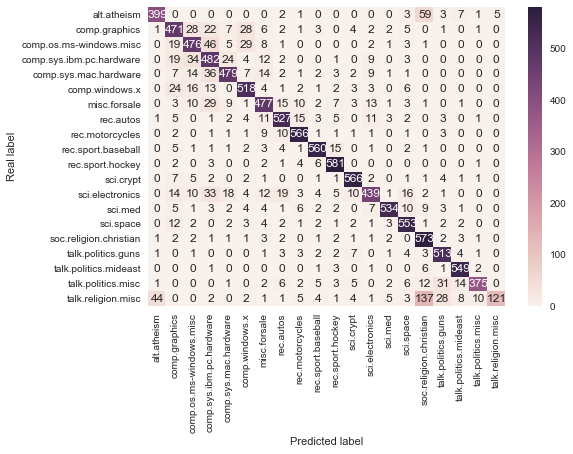

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict

# pipeline of model
model = make_pipeline(TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5), MultinomialNB())
y_pred = cross_val_predict(model, X, y, cv=3)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print (classification_report(y, y_pred, target_names = news_data.target_names))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y)
plot_confusion_matrix(cm, news_data.target_names)

# Example predicting new text!

In [26]:
## predict function for any string
def predict_category(s, target_names, model):
    pred = model.predict([s])
    return target_names[pred[0]]

model.fit(X, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=10,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:

print (predict_category('sending a payload to ISS', news_data.target_names, model))
print (predict_category('do you beleive in god ?', news_data.target_names, model))
print (predict_category('I do not beleive in god.', news_data.target_names, model))
print (predict_category('Did the patien have an injection?', news_data.target_names, model))
print (predict_category('My car is better than yours', news_data.target_names, model))

print (predict_category('Nasa said there is water on Mars', news_data.target_names, model))
print (predict_category('Gender quota in Germany', news_data.target_names, model))


sci.space
soc.religion.christian
soc.religion.christian
sci.med
rec.autos
sci.space
talk.politics.misc
rec.sport.hockey


# Most important words per class

In [32]:
def most_informative_words( pipelineModel, class_labels, n=10):
    vectorizer = pipelineModel.named_steps['tfidfvectorizer']
    multinomialnb = pipelineModel.named_steps['multinomialnb']
    
    feature_names = vectorizer.get_feature_names()
    
    for class_index in range(len(class_labels)):
        print("****************")
        print (class_labels[class_index])
        topn = sorted(zip(multinomialnb.coef_[class_index], feature_names))[-n:]
        for coef, feat in reversed(topn):
            print ("%3.2f %s"%(coef, feat))
        

most_informative_words(model, news_data.target_names)

****************
alt.atheism
-6.57 keith
-6.67 god
-6.93 caltech
-7.03 atheists
-7.10 livesey
-7.14 atheism
-7.14 com
-7.19 people
-7.19 sgi
-7.29 morality
****************
comp.graphics
-6.46 graphics
-7.12 image
-7.22 3d
-7.24 files
-7.30 university
-7.31 com
-7.36 thanks
-7.40 polygon
-7.42 posting
-7.43 file
****************
comp.os.ms-windows.misc
-5.75 windows
-6.80 file
-6.86 dos
-7.06 files
-7.15 driver
-7.20 drivers
-7.24 com
-7.25 ms
-7.30 card
-7.33 university
****************
comp.sys.ibm.pc.hardware
-6.54 scsi
-6.58 drive
-6.82 card
-6.85 ide
-6.93 bus
-6.98 com
-6.99 controller
-7.15 pc
-7.27 disk
-7.34 thanks
****************
comp.sys.mac.hardware
-6.41 mac
-6.55 apple
-7.10 drive
-7.20 quadra
-7.31 centris
-7.31 se
-7.32 monitor
-7.37 simms
-7.38 scsi
-7.39 duo
****************
comp.windows.x
-6.34 window
-6.74 motif
-6.84 mit
-6.89 com
-6.91 server
-7.12 widget
-7.21 xterm
-7.22 x11r5
-7.29 application
-7.35 lcs
****************
misc.forsale
-6.06 sale
-6.90 00
-7.00 o

# How about KNN? 

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.86      0.81       480
           comp.graphics       0.56      0.67      0.61       584
 comp.os.ms-windows.misc       0.60      0.71      0.65       591
comp.sys.ibm.pc.hardware       0.56      0.61      0.58       590
   comp.sys.mac.hardware       0.63      0.62      0.62       578
          comp.windows.x       0.75      0.71      0.73       593
            misc.forsale       0.53      0.51      0.52       585
               rec.autos       0.73      0.71      0.72       594
         rec.motorcycles       0.79      0.80      0.80       598
      rec.sport.baseball       0.79      0.79      0.79       597
        rec.sport.hockey       0.81      0.89      0.84       600
               sci.crypt       0.87      0.89      0.88       595
         sci.electronics       0.73      0.55      0.63       591
                 sci.med       0.85      0.75      0.80       594
         

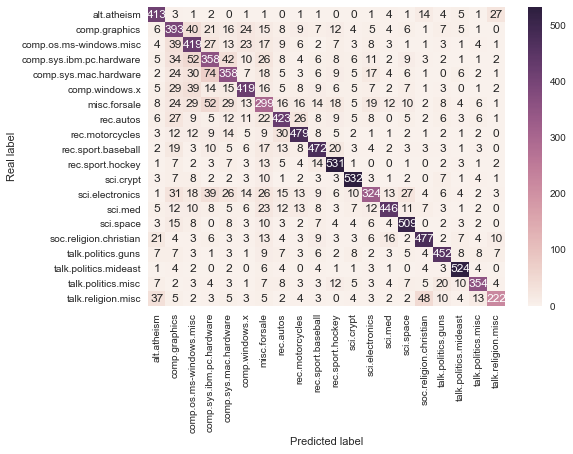

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict

model = make_pipeline(TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5), KNeighborsClassifier(n_neighbors=10))
y_pred = cross_val_predict(model, X, y, cv=3)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print (classification_report(y, y_pred, target_names = news_data.target_names))
print ("Accuracy: ", accuracy_score(y, y_pred))
cm =  confusion_matrix(y_pred=y_pred, y_true=y)
plot_confusion_matrix(cm, news_data.target_names)

# Using the TF-IDF vectors and nearest neighbours to find similar text

In [34]:
from sklearn.neighbors import NearestNeighbors

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5).fit(X)
tfidf_X = tfidf_vectorizer.transform(X)

model = NearestNeighbors()
model.fit(tfidf_X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [35]:
text = "I am not sure the OS is working, maybe i need to format my PC"
#text = "Which CPU do you think is faster ? I want to play a lot of games"
#text = "People believe there is life on Mars"

new_x = tfidf_vectorizer.transform([text])
distance, neighbours = model.kneighbors(new_x, n_neighbors=5)

for neighbour in neighbours[0]:
    print (X[neighbour])

Subject: newss
From: pollarda@physc1.byu.edu
Distribution: world
Organization: Brigham Young University
Lines: 24



I am working on a project where we are going to be including
both still and moving grapics within a database.  Of course
JPEG and MPEG come to mind as the formats of choice for the
various files.  However, from what I read on the Net, it seems
as if there are several different forms of each of these.

What I want to do, is settle on a file format which I can count
on as being a standard format 10 years from now.  I know Apple is going
to support Quicktime on the new Power PC's and, so this
may be the format of choice.

What format does Apple's Quicktime use for their products?  I guess
it is some kind of MPEG for their motion picture. Is it any different
than standard MPEG files?

Thanx for any info!

Art.
Pollarda@xray.byu.edu


  

From: duncans@hotlips.Princeton.EDU (Duncan Smith)
Subject: Question about LocalTalk/AppleShare on MS-DOS system
Summary: How do I make App